

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [ ]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-09-25 02:13:35--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-09-25 02:13:35--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv’

enterprise.csv      100%[==============

## Paso 0: Importar librerías y configuración

In [ ]:
import pandas as pd

pd.read_csv("enterprise.csv")

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267
...,...,...,...,...,...,...,...,...
1056,30/09/2017,119576.8000,3591.591000,1525.635,1316.743,7680.47400,9648.771,63291.07954
1057,31/12/2019,342991.8480,-4428.683000,17253.700,32412.939,-18999.31300,83806.330,432082.31830
1058,30/06/2011,55019.3000,15640.260900,4929.800,8653.000,4124.90000,58128.300,189022.60000
1059,30/09/2012,129.0000,34.700000,5.600,1.700,15.70000,460.200,631.30000


## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valuationdate  1061 non-null   object 
 1   revenues       1061 non-null   float64
 2   ebit           1061 non-null   float64
 3   depreciation   1061 non-null   float64
 4   capex          1061 non-null   float64
 5   ncwc           1061 non-null   float64
 6   bv             1061 non-null   float64
 7   y              1061 non-null   float64
dtypes: float64(7), object(1)
memory usage: 66.4+ KB


In [ ]:
pd.read_csv("enterprise.csv")

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267
...,...,...,...,...,...,...,...,...
1056,30/09/2017,119576.8000,3591.591000,1525.635,1316.743,7680.47400,9648.771,63291.07954
1057,31/12/2019,342991.8480,-4428.683000,17253.700,32412.939,-18999.31300,83806.330,432082.31830
1058,30/06/2011,55019.3000,15640.260900,4929.800,8653.000,4124.90000,58128.300,189022.60000
1059,30/09/2012,129.0000,34.700000,5.600,1.700,15.70000,460.200,631.30000


In [ ]:
df.describe()


,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


In [ ]:
display(df.head())

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


In [ ]:
df.tail()

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
1056,30/09/2017,119576.800,3591.5910,1525.635,1316.743,7680.474,9648.771,63291.07954
1057,31/12/2019,342991.848,-4428.6830,17253.700,32412.939,-18999.313,83806.330,432082.31830
1058,30/06/2011,55019.300,15640.2609,4929.800,8653.000,4124.900,58128.300,189022.60000
1059,30/09/2012,129.000,34.7000,5.600,1.700,15.700,460.200,631.30000
1060,31/03/2017,622045.081,40670.8560,12413.254,12940.654,43566.142,119065.961,586127.47150


### Estadísticas Descriptivas y Distribuciones

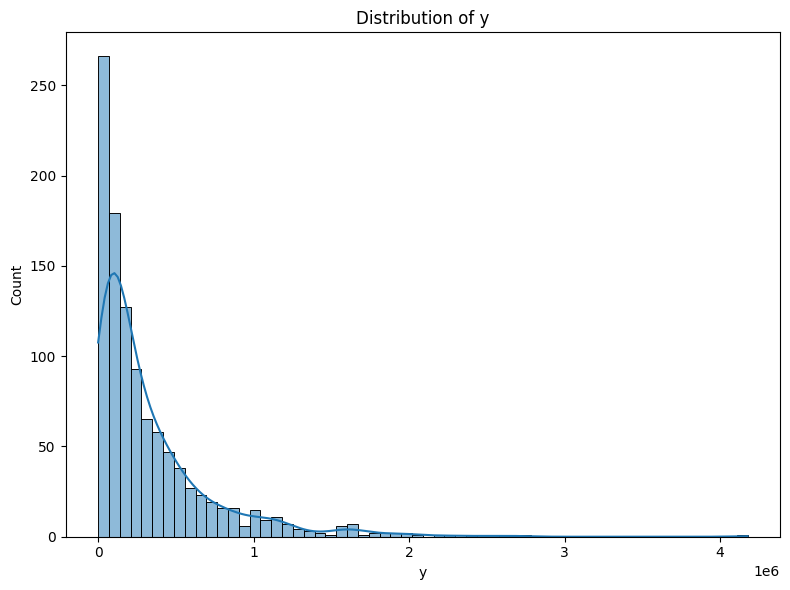

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for plotting distributions
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distribution for the target variable 'y'
plt.figure(figsize=(8, 6))
sns.histplot(df['y'], kde=True)
plt.title(f'Distribution of y')
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

*Responde con tu razonamiento propio aquí.*

RTA:

1. Al usar Y como variable objetivo, estamos intentando resolver un problema de regresión. Específicamente, buscamos predecir el valor de Y basándonos en las otras variables explicativas (features).

2. Sí, al observar las estadísticas descriptivas y los gráficos de distribución, parece haber valores atípicos (outliers) en varias de las variables numéricas, especialmente en revenues, ebit, depreciation, capex, ncwc, bv y Y. Los outliers pueden afectar significativamente a la regresión lineal, ya que el modelo lineal es sensible a puntos extremos que pueden distorsionar la línea de mejor ajuste y, por lo tanto, los coeficientes del modelo.

3. La columna valuationdate es de tipo object actualmente. Si bien, la fecha exacta podría no ser directamente útil en su formato actual para un modelo lineal simple, la información temporal (como el año o trimestre) extraída de ella podría ser relevante si la variable Y tiene una tendencia o estacionalidad a lo largo del tiempo. Sin embargo, para un modelo de regresión lineal simple, podríamos excluirla inicialmente a menos que haya una justificación clara para su inclusión después de un análisis temporal más profundo. Para este análisis básico, probablemente la excluiríamos.

## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

In [ ]:
df.loc[df['ebit'] < 0, 'ebit'] = 0
df.loc[df['depreciation'] < 0, 'depreciation'] = 0
df.loc[df['capex'] < 0, 'capex'] = 0
df.loc[df['ncwc'] < 0, 'ncwc'] = 0
df.loc[df['bv'] < 0, 'bv'] = 0


In [ ]:
df.head()

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


In [ ]:
df.isnull().sum()

,0
valuationdate,0
revenues,0
ebit,0
depreciation,0
capex,0
ncwc,0
bv,0
y,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)
df

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267
...,...,...,...,...,...,...,...,...
1056,30/09/2017,119576.8000,3591.591000,1525.635,1316.743,7680.47400,9648.771,63291.07954
1057,31/12/2019,342991.8480,-4428.683000,17253.700,32412.939,-18999.31300,83806.330,432082.31830
1058,30/06/2011,55019.3000,15640.260900,4929.800,8653.000,4124.90000,58128.300,189022.60000
1059,30/09/2012,129.0000,34.700000,5.600,1.700,15.70000,460.200,631.30000


In [ ]:
df['bv'].fillna(df['bv'].mean(), inplace=True)
df

/tmp/ipython-input-1065558200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bv'].fillna(df['bv'].mean(), inplace=True)


,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267
...,...,...,...,...,...,...,...,...
1056,30/09/2017,119576.8000,3591.591000,1525.635,1316.743,7680.47400,9648.771,63291.07954
1057,31/12/2019,342991.8480,0.000000,17253.700,32412.939,0.00000,83806.330,432082.31830
1058,30/06/2011,55019.3000,15640.260900,4929.800,8653.000,4124.90000,58128.300,189022.60000
1059,30/09/2012,129.0000,34.700000,5.600,1.700,15.70000,460.200,631.30000


Todas las columnas todos los datos completos, niguna columna tiene datos faltantes.

### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

*Responde con tu razonamiento aquí.*

RTA:

Es crucial tratar los valores faltantes y los outliers antes de entrenar un modelo de regresión lineal porque la mayoría de los algoritmos no pueden procesar datos incompletos, y la presencia de valores atípicos puede sesgar significativamente la línea de mejor ajuste al tener una influencia desproporcionada en la minimización de los errores cuadráticos, lo que lleva a un modelo menos preciso y con menor capacidad de generalización.

## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

Coeficientes del modelo: [ 0.02322012  5.27550905  2.73214042 -6.58130896  0.40032528  2.14744195]
Intercepto del modelo: 65831.85507508152


In [ ]:
X = df.drop(['valuationdate', 'y'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (848, 6) (848,)
Dimensiones del conjunto de prueba (X_test, y_test): (213, 6) (213,)


### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

*Responde con tu razonamiento.*

RTA:

1.  Es importante separar los datos en conjuntos de entrenamiento y prueba para poder evaluar de manera realista qué tan bien funcionará nuestro modelo con datos nuevos que no ha visto antes. Usamos el conjunto de entrenamiento para que el modelo aprenda a encontrar patrones en los datos, y luego usamos el conjunto de prueba, que contiene datos diferentes, para ver si ese aprendizaje es efectivo y si el modelo puede hacer predicciones precisas en situaciones desconocidas.

2.  Si entrenamos y evaluamos el modelo en el mismo conjunto de datos, el modelo podría simplemente memorizar las respuestas específicas de esos datos en lugar de aprender las reglas generales que relacionan las variables. Esto haría que el modelo pareciera muy bueno en ese conjunto de datos particular, pero sería incapaz de hacer buenas predicciones con datos nuevos. Es como si un estudiante solo estudiara las preguntas de un examen viejo y obtuviera una calificación perfecta en ese mismo examen, pero no supiera responder preguntas similares en un examen diferente. Esto se llama sobreajuste.

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
intercept = model.intercept_
coefficients = model.coef_

print("Intercepto:", intercept)
print("Coeficientes:", coefficients)

Intercepto: 65831.85507508152
Coeficientes: [ 0.02322012  5.27550905  2.73214042 -6.58130896  0.40032528  2.14744195]


### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("MSE (Entrenamiento):", mse_train)
print("R² (Entrenamiento):", r2_train)
print("MSE (Prueba):", mse_test)
print("R² (Prueba):", r2_test)

MSE (Entrenamiento): 48522133803.69384
R² (Entrenamiento): 0.6792930181145829
MSE (Prueba): 107962028824.1209
R² (Prueba): 0.5014382058306897


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

*Responde con tu razonamiento.*

**Respuestas:**

1.  Comparamos las métricas en los conjuntos de entrenamiento y prueba para saber si nuestro modelo ha aprendido bien de los datos que usó para entrenar y, más importante, si es capaz de hacer predicciones correctas con datos completamente nuevos que no ha visto antes. Si las métricas son similares, significa que el modelo no solo memorizó los datos de entrenamiento, sino que aprendió reglas generales que funcionan para nuevos datos.

2.  Si el error en el conjunto de entrenamiento es mucho menor que en el conjunto de prueba, generalmente significa que el modelo se ha "sobreajustado" a los datos de entrenamiento. Es como si estudiara para un examen memorizando solo las respuestas de ejemplo, y le va muy bien en esos ejemplos, pero falla en preguntas nuevas. Si el error en entrenamiento es mucho mayor que en prueba (lo cual es menos común en la práctica), podría indicar problemas en cómo se prepararon los datos o en la configuración del modelo.

3.  El R² es como un porcentaje que nos dice cuánta de la variación en la variable que queremos predecir (Y) puede ser explicada por nuestras variables de entrada. Un R² cercano a 1 significa que nuestro modelo explica casi toda la variación y se ajusta muy bien a los datos. Un R² cercano a 0 significa que el modelo explica muy poca o ninguna variación, y básicamente no es mejor que simplemente predecir el promedio de Y. Un R² negativo (que puede ocurrir en el conjunto de prueba) significa que nuestro modelo es incluso peor que simplemente predecir el promedio, lo cual indica que el modelo no es adecuado para esos datos.

### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

*Responde con tu razonamiento.*

**Respuesta:**

Si observas un patrón claro en la gráfica de residuos, como una forma de U o cualquier otra forma no aleatoria, esto indica que una o más de las asunciones clave de la regresión lineal no se cumplen. Específicamente, un patrón en los residuos sugiere que la relación entre las variables explicativas y la variable objetivo no es lineal. La regresión lineal asume una relación lineal entre las variables. Un patrón no lineal en los residuos (como una U) significa que el modelo lineal no está capturando adecuadamente la verdadera forma de la relación, y que hay información en los datos que el modelo no está utilizando. Esto podría requerir la inclusión de términos no lineales (como variables cuadráticas o transformaciones) en el modelo, o el uso de un modelo diferente que pueda manejar relaciones no lineales.

## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

RTA:

1. La mayoría de los coeficientes (para revenues, ebit, depreciation, ncwc, bv) tienen signo positivo, lo cual generalmente es consistente con la lógica de que estas métricas financieras se relacionan positivamente con el valor (y). El coeficiente negativo de capex es un poco inesperado y podría justificar una exploración más a fondo, pero los demás parecen lógicos.

2. El R² de 0.50 en los datos de prueba indica que el modelo explica la mitad de la variación en y. Si esto es "suficientemente bueno" para un uso práctico depende totalmente del objetivo específico del análisis. Para algunas aplicaciones, 50% podría ser aceptable, para otras podría ser muy bajo. El error (MSE) es alto, lo que significa que las predicciones pueden estar lejos de los valores reales, lo cual es algo a considerar para la precisión requerida.

3. Dado el R² de 0.50 y la posible no linealidad o influencia de outliers, sí, sería recomendable considerar añadir más variables relevantes, probar transformaciones o términos polinómicos si hay no linealidad, o usar técnicas de regularización si hay muchas variables o posible multicolinealidad para obtener un modelo más robusto y generalizable.

### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple captura adecuadamente las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

*Responde con tu razonamiento.*

**Respuesta:**

1.  Nuestro modelo lineal solo logra explicar la mitad de por qué la variable `y` cambia (R² de 0.50 en datos nuevos). Esto sugiere que una línea recta no es suficiente para entender completamente la relación entre `y` y los otros factores; probablemente hay relaciones más complejas o faltan otros factores importantes.

2.  Como el modelo lineal no explica todo, sería bueno probar otras herramientas de predicción que son mejores para encontrar patrones complicados, no solo líneas rectas. Podríamos intentar con árboles de decisión o bosques aleatorios, que son como diagramas de preguntas que ayudan a predecir el resultado. También hay modelos más avanzados como los Gradient Boosting Machines.

3.  Tenemos más de mil filas de datos, lo cual es un buen inicio. Pero para estar muy seguros de nuestras conclusiones y de que el modelo funcione bien en cualquier situación futura, dependerá de qué tan variados sean estos datos y si realmente capturan todas las posibles situaciones. A veces se necesitan muchos más datos o datos de diferentes tipos para estar realmente seguros.

## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!